# Homework 5 Q1
### Jagannathan Chengavalli Lakshminarayanan - 305834859
### Nanditha Raja - 305831258

In [8]:
from sklearn.ensemble import RandomForestClassifier

%matplotlib inline
import matplotlib.image as mpimg 
import matplotlib.pyplot as plt

# Importing the required packages and libraries
# we will need numpy and pandas later
import numpy as np
import pandas as pd

from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [9]:
# reading a CSV file directly from Web, and store it in a pandas DataFrame:
# "read_csv" is a pandas function to read csv files from web or local device:
#iris_df = pd.read_csv('C:/Users/harish/Desktop/Fall17/CS4661/Lectures/HW/HW3/Heart_s.csv')

PATH = 'C:/Users/harish/Desktop/Fall17/CS4661/Lectures/HW/Digit/'

img0 = mpimg.imread('C:/Users/harish/Desktop/Fall17/CS4661/Lectures/HW/Digit/0.jpg')

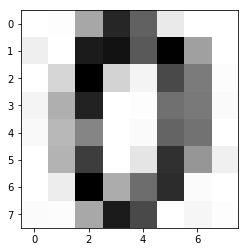

In [10]:
plt.imshow(img0,cmap=plt.cm.gray_r,interpolation='nearest')

In [11]:
# It includes 1797 small images (8x8 pixels), each one includes a hand-written digit (0-9)

# Creating an array to store the 1797 images
df = np.zeros((1797,64))

# Reading all the images and storing them
for i in range (1,1797):
    img = mpimg.imread('C:/Users/harish/Desktop/Fall17/CS4661/Lectures/HW/Digit/'+ str(i)+'.jpg')
    reshape = img.reshape(64)
    df[i] = np.copy(reshape)

print(df)

[[   0.    0.    0. ...,    0.    0.    0.]
 [   0.    0.   11. ...,  157.    0.   12.]
 [   0.    0.    5. ...,  255.  138.    0.]
 ..., 
 [   5.    0.   22. ...,   87.   21.    0.]
 [   7.    0.   22. ...,  196.    0.    7.]
 [   0.   17.  155. ...,  198.   26.    0.]]


In [23]:
# Creating the Feature Matrix for the dataset:

X = pd.DataFrame(df)  
#print (X [0::10])

# select a Series of labels (the last column) from the DataFrame
label = pd.read_csv('C:/Users/harish/Desktop/Fall17/CS4661/Lectures/HW/label.csv')

y = label['digit']
#print (y [0::100])

0       0
100     4
200     1
300     7
400     4
500     8
600     2
700     2
800     4
900     4
1000    1
1100    9
1200    7
1300    3
1400    2
1500    1
1600    2
1700    5
Name: digit, dtype: int64


In [24]:
# Randomly splitting the original dataset into training set and testing set
# The function"train_test_split" from "sklearn.cross_validation" library performs random splitting.
# "test_size=0.1" means that pick 10% of data samples for testing set, and the rest (90%) for training set.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=2)

In [25]:
# Creating an 'object' for RF Classifier class
my_rf = RandomForestClassifier(n_estimators = 19, bootstrap = True, random_state=2)

# Training the data
my_rf.fit(X_train, y_train)

# Predicting the data
y_predict_rf = my_rf.predict(X_test)

# Calculating the accuracy
rf_accuracy = accuracy_score (y_test, y_predict_rf)

print("RF Classifier accuracy:",rf_accuracy)

RF Classifier accuracy: 0.916666666667


In [27]:
#Identifying and checking the misclassified data
misclassified_data = np.where(y_test != y_predict_rf)

# Printing the data
print(misclassified_data)
#Counting the misclassified data
print(len(misclassified_data[0]))

(array([  4,  13,  16,  41,  44,  45,  46,  49,  63, 115, 130, 137, 165,
       174, 179], dtype=int64),)
15


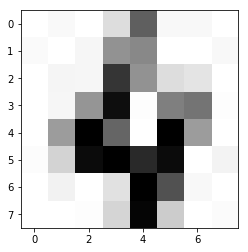

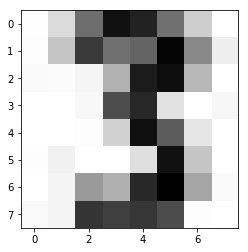

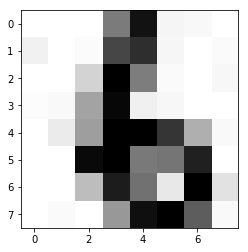

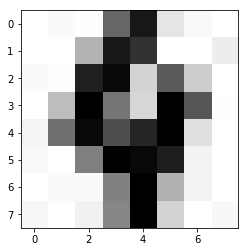

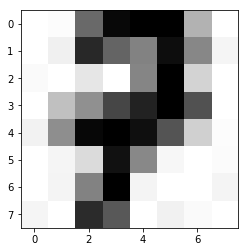

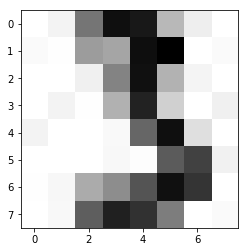

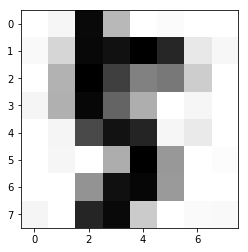

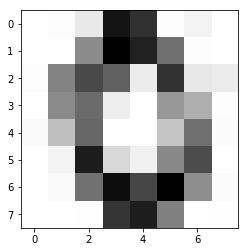

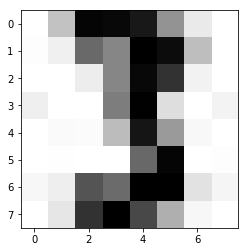

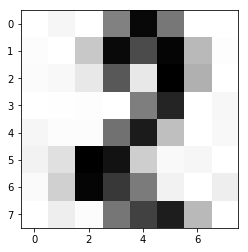

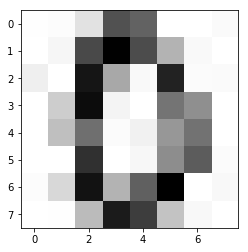

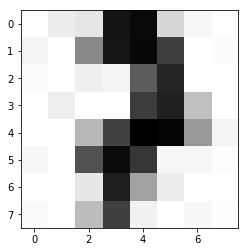

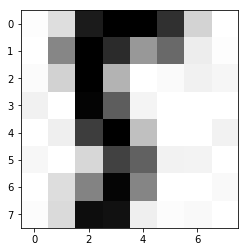

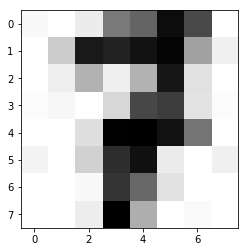

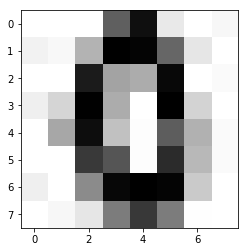

In [30]:
for i in misclassified_data[0]:
    img = mpimg.imread('C:/Users/harish/Desktop/Fall17/CS4661/Lectures/HW/Digit/'+ str(i)+'.jpg')
    plt.imshow(img,cmap=plt.cm.gray_r, interpolation='nearest')
    plt.show()